In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [8]:
KYOTO = pd.read_csv('../data/kyoto.csv', parse_dates=True)
JAPAN = pd.read_csv('../data/japan.csv', parse_dates=True)
DC = pd.read_csv('../data/washingtondc.csv', parse_dates=True)
SCHWIEZ = pd.read_csv('../data/liestal.csv', parse_dates=True)
VANCOUVER = pd.read_csv('../data/vancouver.csv', parse_dates=True)

In [9]:
def to_date(df):
    df['bloom_date'] = pd.to_datetime(df['bloom_date'], format='%Y-%m-%d')
    return df

In [10]:
JAPAN = to_date(JAPAN)
DC = to_date(DC)
SCHWIEZ = to_date(SCHWIEZ)
VANCOUVER = to_date(VANCOUVER)

In [17]:
def plot_scatter(dfs=list):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 10))

    for cnt, loc in enumerate(dfs):
        name = loc['location'].unique()[0]
        sns.scatterplot(
            x=loc['year'], y=loc['bloom_doy'], 
            ax=axes[cnt], color='blue', alpha=0.70)
        axes[cnt].set_title(f"{name}")
    
    plt.tight_layout()

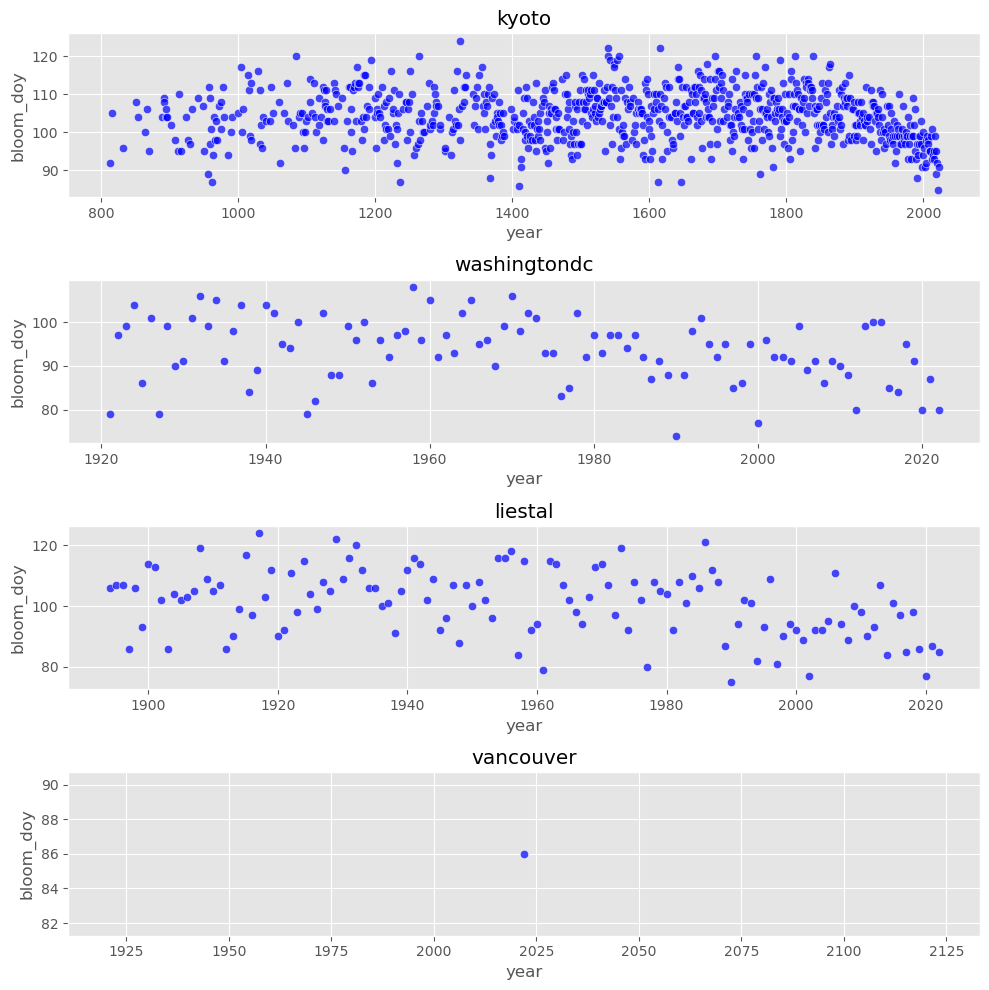

In [18]:
plot_scatter([KYOTO, DC, SCHWIEZ, VANCOUVER])

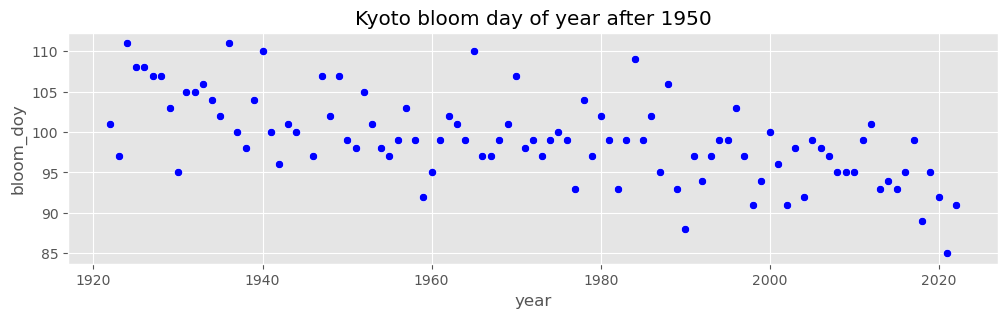

In [80]:
# lets zoom in on Kyoto
kyoto_after_1950 = KYOTO[KYOTO['year'] > 1920]
plt.figure(figsize=(12, 3))
sns.scatterplot(
    x=kyoto_after_1950['year'], y=kyoto_after_1950['bloom_doy'],
    color='blue'
)
plt.title('Kyoto bloom day of year after 1950');

In [65]:
def plot_dist(dfs=list):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))

    for cnt, loc in enumerate(dfs):
        name = loc['location'].unique()[0]
        sns.kdeplot(
            x=loc['bloom_doy'], 
            ax=axes[cnt], color='blue', alpha=0.70)
        axes[cnt].set_title(f"{name}")
    
    plt.tight_layout()

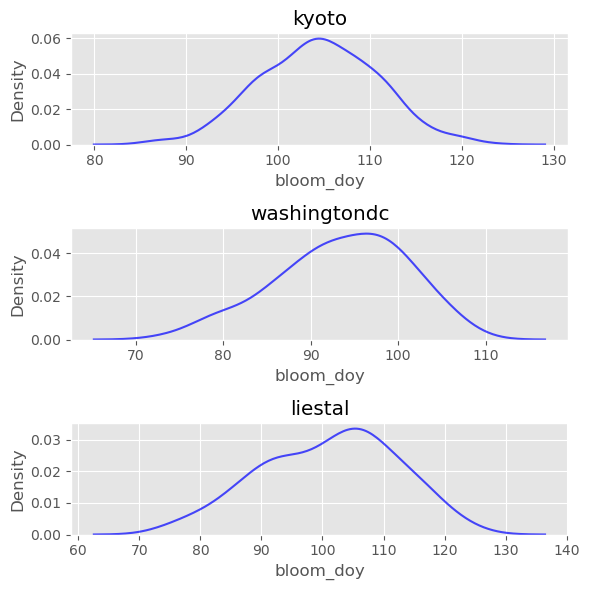

In [66]:
plot_dist([KYOTO, DC, SCHWIEZ])

In [121]:
# is there more than one recorded bloom_doy per year?
print((KYOTO['year'].value_counts().values > 1).sum())
print((DC['year'].value_counts().values > 1).sum())
print((SCHWIEZ['year'].value_counts().values > 1).sum())

0
0
0


In [136]:
# are there any years (from beginning to end) with missing obs.?
print((KYOTO['year'].diff().values > 1).sum())
print((DC['year'].diff().values > 1).sum())
print((SCHWIEZ['year'].diff().values > 1).sums())

153
0
0


In [48]:
KYOTO['year'].min(), KYOTO['year'].max(), DC['year'].max(), SCHWIEZ['year'].max(), VANCOUVER['year'].max()

(812, 2022, 2022, 2022, 2022)

In [122]:
#df = pd.DataFrame(np.arange(812, 2023, 1), columns=['year'])
df = pd.DataFrame(np.arange(1922, 2023, 1), columns=['year'])

In [123]:
concat = pd.concat([KYOTO, DC, SCHWIEZ])

merged = pd.merge(
    left=df,
    right=concat[['location','year', 'bloom_doy']],
    how='left',
    on='year'
).dropna(subset=['location', 'bloom_doy'])

In [94]:
KYOTO.shape, SCHWIEZ.shape, DC.shape, merged.shape

((834, 7), (129, 7), (102, 7), (302, 3))

In [124]:
merged.groupby(['location'])['year'].count()

location
kyoto           100
liestal         101
washingtondc    101
Name: year, dtype: int64

In [108]:
kyoto = merged[merged['location'] == 'kyoto']
kyoto[kyoto['year'].diff() > 1]

,year,location,bloom_doy
71,1946,kyoto,97


In [119]:
kyoto.loc[65:75]

,year,location,bloom_doy
66,1944,kyoto,100
71,1946,kyoto,97
74,1947,kyoto,107


In [112]:
merged[merged['year'] == 1945]

,year,location,bloom_doy
69,1945,washingtondc,79
70,1945,liestal,92


In [115]:
mean_20_years = kyoto.query('year > 1940 and year < 1960')['bloom_doy'].mean()

In [120]:
merged.loc[-1] = [1945, 'kyoto', mean_20_years]
merged = merged.sort_values(by='year')
merged.groupby(['location'])['year'].count()

location
kyoto           101
liestal         101
washingtondc    101
Name: year, dtype: int64

In [126]:
merged.shape

(302, 3)

In [121]:
merged.to_csv('../data/year_bloom_doy_merged.csv', index=False)